## A simple neural network classifier for Fashion MNIST dataset with three layers!

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch


import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

In [0]:
from torch import nn #neural network module
from torch import optim  #optimizer module

In [0]:
#tranform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [5]:
#download and load training data

trainset=datasets.FashionMNIST('FashionMNIST_data/',download=True,train=True,transform=transform)


0it [00:00, ?it/s]

26427392it [00:02, 12829858.97it/s]                             


Extracting FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 103174.03it/s]           
0it [00:00, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4172870.27it/s]                             
0it [00:00, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 31559.41it/s]            

Extracting FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
##we have data loaded into trainloader with batch size 64
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [7]:
trainloader.batch_size

64

In [8]:
trainloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: FashionMNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(0.5,))
                         )
    Target Transforms (if any): None

## Let's visualize our dataset

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


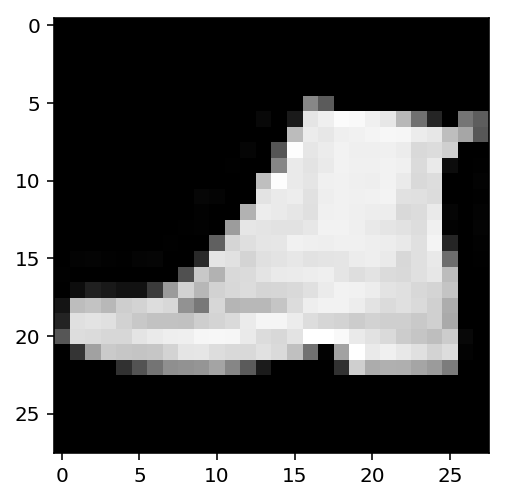

In [9]:

dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

### Let's define a simple network of three layers


In [0]:
## define our model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

learning_rate=0.003
##define our loss function
criterion = nn.NLLLoss()
##stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## TRAIN THE NETWORK

In [16]:
epochs = 7
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten Fashion MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
       
        optimizer.zero_grad()
        
        output = model(images) ##forward pass
        loss = criterion(output, labels) ##calculate loss
        loss.backward()  #backward pass
        optimizer.step() ##update weights
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5295172079857479
Training loss: 0.5076393917965483
Training loss: 0.4910996055393331
Training loss: 0.4773845299601809
Training loss: 0.46561506892572335
Training loss: 0.4559094742067587
Training loss: 0.44687731521152485


In [0]:
## Next batch images and labels
images, labels = next(iter(trainloader))

img = images[1].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
##Output of the network
ps = torch.exp(logps)

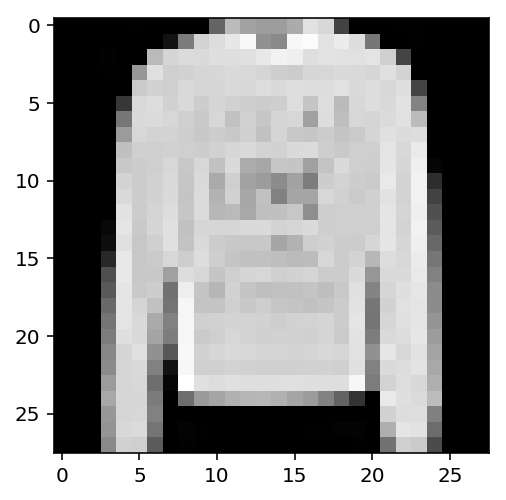

In [49]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

### OUR LABELS
0 T-shirt/top <br>
1 Trouser <br>
2 Pullover <br>
3 Dress <br>
4 Coat <br>
5 Sandal <br>
6 Shirt <br>
7 Sneaker <br>
8 Bag <br>
9 Ankle boot <br>

In [61]:
## Original Label
print(labels[1])

tensor(2)


In [0]:
class_probabilities=ps.numpy()

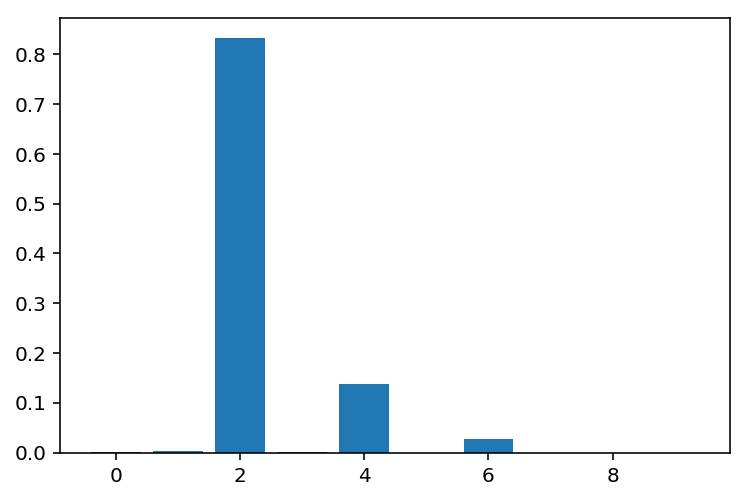

In [63]:
index = np.arange(0,10)
plt.bar(index, class_probabilities.reshape(10))
plt.show()